# Global Optimization Algorithms Comparison on 6 Trajectory Gym Problems

In this tutorial, we will benchmark and compare three different global optimization algorithms taken from PyGMO (i.e., ACOmi, SGA, SADE, PSO) on six different global trajectory optimization problems (i.e., Cassini2, E-V-E 1 DSM, Messenger, Rosetta, E-M 5 imp, E-M 7 imp). All the problems are available in the Pykep's trajectory gym, whereas all the algorithms are available from PyGMO. 

In the code, we will see two nested loops: one that ranges through the different problems and another one that executes multiple runs of the same problem with a different and controlled seed. In this way, we run each problem ten times and we average the fitness values before plotting them. Furthermore, the initial population of each algorithm is the same for each run: so that we make sure that the algorithms start from the same baseline.

The final plots show the results in terms of fitness values as a function of function evaluations. In particular, the fitness values (i.e., the Delta-V required for the mission) is plotted in a semi-logarithmic scale.

Note that it is necessary to wait a few minutes before reproducing the plots.

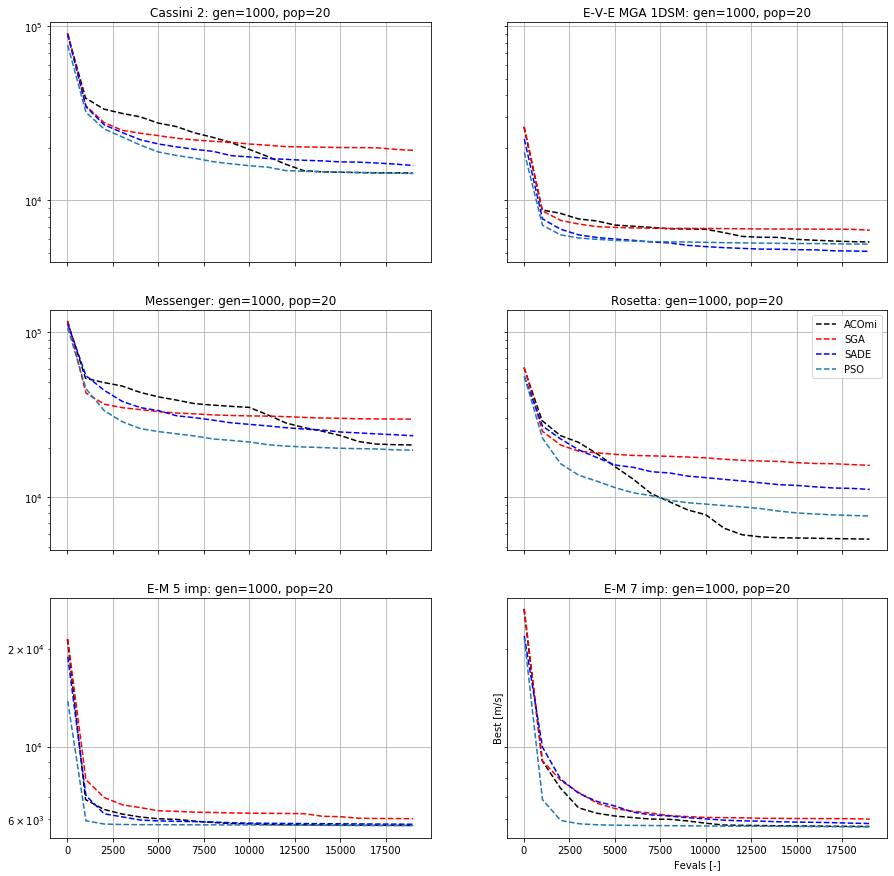

In [1]:
import pygmo as pg
import pykep as pk
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plp
%matplotlib inline

fig, axes = plp.subplots(nrows=3, ncols=2, sharex='col', sharey='row', figsize=(15,15))
problems=[pk.trajopt.gym.cassini2, pk.trajopt.gym.eve_mga1dsm, pk.trajopt.gym.messenger, pk.trajopt.gym.rosetta, pk.trajopt.gym.em5imp, pk.trajopt.gym.em7imp]
plp.xlabel('Fevals [-]')
plp.ylabel('Best [m/s]')


for prob_number in range(0,6):
    vec=np.zeros(20)
    vec_2=np.zeros(20)
    vec_3=np.zeros(20)
    vec_4=np.zeros(20)

    for x in range(1,11):
        udp = problems[prob_number]

        prob=pg.problem(udp)
        prob_2=pg.problem(udp)
        prob_3=pg.problem(udp)
        prob_4=pg.problem(udp)

        uda=pg.gaco(gen=1000, ker=15, q=1.0, oracle=1e9, acc=0.01, threshold=500, n_gen_mark=7)
        uda_2=pg.sga(gen=1000)
        uda_3=pg.sade(gen=1000)
        uda_4=pg.pso(gen=1000)

        algo=pg.algorithm(uda)
        algo_2=pg.algorithm(uda_2)
        algo_3=pg.algorithm(uda_3)
        algo_4=pg.algorithm(uda_4)

        pop=pg.population(prob=prob, size=20, seed=x)
        pop_2=pg.population(prob=prob_2, size=20, seed=x)
        pop_3=pg.population(prob=prob_3, size=20, seed=x)
        pop_4=pg.population(prob=prob_4, size=20, seed=x)

        algo.set_verbosity(50)
        algo_2.set_verbosity(50)
        algo_3.set_verbosity(50)
        algo_4.set_verbosity(50)

        pop=algo.evolve(pop)
        pop_2=algo_2.evolve(pop_2)
        pop_3=algo_3.evolve(pop_3)
        pop_4=algo_4.evolve(pop_4)

        uda_gaco=algo.extract(pg.gaco)
        uda_sga=algo_2.extract(pg.sga)
        uda_sade=algo_3.extract(pg.sade)
        uda_pso=algo_4.extract(pg.pso)

        log_gaco=uda_gaco.get_log()
        log_sga=uda_sga.get_log()
        log_sade=uda_sade.get_log()
        log_pso=uda_pso.get_log()

        #for storing them in a vec:
        i=0
        for entry in log_gaco:
            vec[i]+=entry[2]
            i=i+1
        i=0
        for entry_2 in log_sga:
            vec_2[i]+=entry_2[2]
            i=i+1            
        i=0
        for entry_3 in log_sade:
            vec_3[i]+=entry_3[2]
            i=i+1
        i=0
        for entry_4 in log_pso:
            vec_4[i]+=entry_4[2]
            i=i+1                   
    vec=np.true_divide(vec,10)
    vec_2=np.true_divide(vec_2,10)
    vec_3=np.true_divide(vec_3,10)
    vec_4=np.true_divide(vec_4,10)

    if (prob_number==0):
            axes[0,0].semilogy([entry[1] for entry in log_gaco], vec,'k--', label = 'ACOmi')
            axes[0,0].semilogy([entry[1] for entry in log_sga], vec_2,'r--', label = 'SGA')
            axes[0,0].semilogy([entry[1] for entry in log_sade], vec_3, 'b--', label = 'SADE')
            axes[0,0].semilogy([entry[1] for entry in log_pso], vec_4, '--', label = 'PSO')
            #axes[0,0].legend(loc='upper right')
            axes[0,0].set_title('Cassini 2: gen=1000, pop=20')

    elif (prob_number==1):
            axes[0,1].semilogy([entry[1] for entry in log_gaco], vec,'k--', label = 'ACOmi')
            axes[0,1].semilogy([entry[1] for entry in log_sga], vec_2,'r--', label = 'SGA')
            axes[0,1].semilogy([entry[1] for entry in log_sade], vec_3, 'b--', label = 'SADE')
            axes[0,1].semilogy([entry[1] for entry in log_pso], vec_4, '--', label = 'PSO')
            #axes[0,1].legend(loc='upper right')
            axes[0,1].set_title('E-V-E MGA 1DSM: gen=1000, pop=20')

    elif (prob_number==2):
            axes[1,0].semilogy([entry[1] for entry in log_gaco], vec,'k--', label = 'ACOmi')
            axes[1,0].semilogy([entry[1] for entry in log_sga], vec_2,'r--', label = 'SGA')
            axes[1,0].semilogy([entry[1] for entry in log_sade], vec_3, 'b--', label = 'SADE')
            axes[1,0].semilogy([entry[1] for entry in log_pso], vec_4, '--', label = 'PSO')            
            #axes[1,0].legend(loc='upper right')
            axes[1,0].set_title('Messenger: gen=1000, pop=20')

    elif (prob_number==3):
            axes[1,1].semilogy([entry[1] for entry in log_gaco], vec,'k--', label = 'ACOmi')
            axes[1,1].semilogy([entry[1] for entry in log_sga], vec_2,'r--', label = 'SGA')
            axes[1,1].semilogy([entry[1] for entry in log_sade], vec_3, 'b--', label = 'SADE')
            axes[1,1].semilogy([entry[1] for entry in log_pso], vec_4, '--', label = 'PSO')
            axes[1,1].legend(loc='upper right')
            axes[1,1].set_title('Rosetta: gen=1000, pop=20')


    elif (prob_number==4):
            axes[2,0].semilogy([entry[1] for entry in log_gaco], vec,'k--', label = 'ACOmi')
            axes[2,0].semilogy([entry[1] for entry in log_sga], vec_2,'r--', label = 'SGA')
            axes[2,0].semilogy([entry[1] for entry in log_sade], vec_3, 'b--', label = 'SADE')
            axes[2,0].semilogy([entry[1] for entry in log_pso], vec_4, '--', label = 'PSO')
            #axes[2,0].legend(loc='upper right')
            axes[2,0].set_title('E-M 5 imp: gen=1000, pop=20')

    elif (prob_number==5):
            axes[2,1].semilogy([entry[1] for entry in log_gaco], vec,'k--', label = 'ACOmi')
            axes[2,1].semilogy([entry[1] for entry in log_sga], vec_2,'r--', label = 'SGA')
            axes[2,1].semilogy([entry[1] for entry in log_sade], vec_3, 'b--', label = 'SADE')
            axes[2,1].semilogy([entry[1] for entry in log_pso], vec_4, '--', label = 'PSO')
            #axes[2,1].legend(loc='upper right')
            axes[2,1].set_title('E-M 7 imp: gen=1000, pop=20')
    
for ax in axes.flat:  
    ax.grid() 

plp.savefig("GTOP_database_pop20.jpg")

    